In [3]:
!pip install sastrawi

  Using cached Sastrawi-1.0.1-py2.py3-none-any.whl.metadata (909 bytes)
Using cached Sastrawi-1.0.1-py2.py3-none-any.whl (209 kB)


In [4]:
import pandas as pd
import pandas as dataframe
import string
import nltk
import matplotlib as mpl
import matplotlib.pyplot as plt
import re
import collections
import sys
import os
import numpy
import seaborn as sns
import csv
from collections import OrderedDict, Counter
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from IPython.display import display
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from pylab import figure, axes, pie, title, show
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [5]:
import pandas as pd
data = pd.read_csv("/content/SCRAPING KOMEN IG N USER.xlsx (2).csv")
data

,link_postingan,User_collab,User_post,User_comment,comment,tanggal_posting
0,https://www.instagram.com/bpom.surabaya/reel/D...,NaN,bpom.surabaya,yuliadi_kurniawan,Sang Maestro Thomas Alfa Fikri Sound.....wakak...,29 juli 2025
1,https://www.instagram.com/bpom.surabaya/reel/D...,NaN,bpom.surabaya,erwan12081979gmail.com4,Sounds fikri Edison mantap🙏 tetap semangat ya👍👍,29 juli 2025
2,https://www.instagram.com/bpom.surabaya/reel/D...,NaN,bpom.surabaya,lastetoro,😂😂,29 juli 2025
3,https://www.instagram.com/bpom.surabaya/p/DNiW...,NaN,bpom.surabaya,yoshefarie,Ereg apa lagi error kah. .saya gak bisa daftar,19 Agustus 2025
4,https://www.instagram.com/bpom.surabaya/p/DNQR...,NaN,bpom.surabaya,tjapdl98_kotabatu,siap,12 Agustus 2025
...,...,...,...,...,...,...
560,https://www.instagram.com/bpom.surabaya/p/C2XW...,NaN,bpom.surabaya,opick_bagong,apakah harus ada ijin nya ???,21 Januari 2024
561,https://www.instagram.com/bpom.surabaya/p/C2XW...,NaN,bpom.surabaya,opick_bagong,Bagaima dengan ijin daging slice ???,21 Januari 2024
562,https://www.instagram.com/bpom.surabaya/reel/C...,NaN,bpom.surabaya,puryani2000,Terimakasih share infonya,19 Januari 2024
563,https://www.instagram.com/bpom.surabaya/p/C1tg...,NaN,bpom.surabaya,afanyudha,Kapan ya min ada program gempur jatim lagi,5 Januari 2024


In [6]:

pre_text = data['comment']
pre_text

,comment
0,Sang Maestro Thomas Alfa Fikri Sound.....wakak...
1,Sounds fikri Edison mantap🙏 tetap semangat ya👍👍
2,😂😂
3,Ereg apa lagi error kah. .saya gak bisa daftar
4,siap
...,...
560,apakah harus ada ijin nya ???
561,Bagaima dengan ijin daging slice ???
562,Terimakasih share infonya
563,Kapan ya min ada program gempur jatim lagi


In [7]:
import re

# Fungsi cleaning
def clean_text(text):
    text = re.sub(r"http\S+", " ", text)
    text = re.sub(r"@\S+", " ", text)
    text = re.sub(r"#\S+", " ", text)
    text = re.sub(r"\d+", " ", text)
    text = re.sub(r"<.*?>", " ", text)
    text = re.sub(r"\n", " ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"[^\w\s]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    text = re.sub(r"[^\x00-\x7F]+", " ", text)
    return text

In [8]:
import pandas as pd
from IPython.display import display

data['comment_clean'] = data['comment'].apply(clean_text)

data_text = data[data['comment_clean'].str.strip() != ''].copy().reset_index(drop=True)

data_emoji = data[data['comment_clean'].str.strip() == ''].copy().reset_index(drop=True)

print(f"Total data teks bersih : {len(data_text)} baris")
print(f"Total komentar emoji   : {len(data_emoji)} baris\n")

data_clean = data_text[['User_comment', 'tanggal_posting', 'comment_clean']].copy().reset_index(drop=True)

label = pd.read_excel("/content/LABELING_KOMEN.xlsx").reset_index(drop=True)

# Pastikan jumlah baris label sama dengan jumlah komentar teks
if len(label) != len(data_clean):
    raise ValueError("Jumlah baris label dan data teks tidak sama!")

data_clean['label'] = label['label_auto']

display(data_clean)
print(data_clean.info())
print(f"Total data setelah diberi label: {len(data_clean)} baris")


Total data teks bersih : 514 baris
Total komentar emoji   : 51 baris



,User_comment,tanggal_posting,comment_clean,label
0,yuliadi_kurniawan,29 juli 2025,Sang Maestro Thomas Alfa Fikri Sound wakakakak,positif
1,erwan12081979gmail.com4,29 juli 2025,Sounds fikri Edison mantap tetap semangat ya,positif
2,yoshefarie,19 Agustus 2025,Ereg apa lagi error kah saya gak bisa daftar,respon
3,tjapdl98_kotabatu,12 Agustus 2025,siap,respon
4,susiloariwardani,6 Juli 2025,Sukses untuk timja BPOM,positif
...,...,...,...,...
509,opick_bagong,21 Januari 2024,apakah harus ada ijin nya,respon
510,opick_bagong,21 Januari 2024,Bagaima dengan ijin daging slice,respon
511,puryani2000,19 Januari 2024,Terimakasih share infonya,positif
512,afanyudha,5 Januari 2024,Kapan ya min ada program gempur jatim lagi,respon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_comment     514 non-null    object
 1   tanggal_posting  514 non-null    object
 2   comment_clean    514 non-null    object
 3   label            514 non-null    object
dtypes: object(4)
memory usage: 16.2+ KB
None
Total data setelah diberi label: 514 baris


In [9]:
output_file = "/content/data_clean_labeled.xlsx"
data_clean.to_excel(output_file, index=False)

print(f"File Excel berhasil disimpan di: {output_file}")


File Excel berhasil disimpan di: /content/data_clean_labeled.xlsx


In [10]:
import pandas as pd
from IPython.display import display

data['comment_clean'] = data['comment'].apply(clean_text)

data_text = data[data['comment_clean'].str.strip() != ''].reset_index(drop=True)
data_emoji = data[data['comment_clean'].str.strip() == '']

print(f"Total data teks bersih : {len(data_text)} baris")
print(f"Total komentar emoji   : {len(data_emoji)} baris\n")

data_clean = data_text[['comment_clean']].copy().reset_index(drop=True)

label = pd.read_excel("/content/LABELING_KOMEN.xlsx").reset_index(drop=True)

# Pastikan jumlah baris cocok
print(f"Jumlah baris LABEL: {len(label)}")
print(f"Jumlah baris DATA BERSIH: {len(data_clean)}\n")

data_clean["label"] = label["label_auto"]

display(data_clean)

print(data_clean.info())
print(f"Total data setelah diberi label: {len(data_clean)} baris")


Total data teks bersih : 514 baris
Total komentar emoji   : 51 baris

Jumlah baris LABEL: 514
Jumlah baris DATA BERSIH: 514



,comment_clean,label
0,Sang Maestro Thomas Alfa Fikri Sound wakakakak,positif
1,Sounds fikri Edison mantap tetap semangat ya,positif
2,Ereg apa lagi error kah saya gak bisa daftar,respon
3,siap,respon
4,Sukses untuk timja BPOM,positif
...,...,...
509,apakah harus ada ijin nya,respon
510,Bagaima dengan ijin daging slice,respon
511,Terimakasih share infonya,positif
512,Kapan ya min ada program gempur jatim lagi,respon


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   comment_clean  514 non-null    object
 1   label          514 non-null    object
dtypes: object(2)
memory usage: 8.2+ KB
None
Total data setelah diberi label: 514 baris


In [11]:
data_clean

,comment_clean,label
0,Sang Maestro Thomas Alfa Fikri Sound wakakakak,positif
1,Sounds fikri Edison mantap tetap semangat ya,positif
2,Ereg apa lagi error kah saya gak bisa daftar,respon
3,siap,respon
4,Sukses untuk timja BPOM,positif
...,...,...
509,apakah harus ada ijin nya,respon
510,Bagaima dengan ijin daging slice,respon
511,Terimakasih share infonya,positif
512,Kapan ya min ada program gempur jatim lagi,respon


In [12]:
# Fungsi deteksi ngegas
def cek_ngegas(teks, threshold=0.7):
    teks = str(teks)
    huruf = re.findall(r"[A-Za-z]", teks)
    if len(huruf) == 0:
        return False
    kapital = [c for c in huruf if c.isupper()]
    return len(kapital)/len(huruf) >= threshold

# Ambil komentar yang ngegas saja
komentar_ngegas = [komentar for komentar in data_clean['comment_clean'] if cek_ngegas(komentar)]

# Tampilkan hasil langsung
for idx, komentar in enumerate(komentar_ngegas, 1):
    print(f"{idx}. {komentar}\n")


1. MAU NGISI PENGADUAN TAPI HARUS BIKIN AKUN DULU TERUS FILE YG DIMINTA GA BISA LEBIH MB GAJELASS WEB JELEK

2. TUTUP TEMPAT PRODUKSI PEMBUATAN TAHU YANG MENGGUNAKAN SAMPAH SEBAGAI BAHAN BAKAR

3. MERDEKA    

4. CEKKLIK LABEL KEDALUWARSA IZINEDAR KEMASAN



In [13]:
# Case folding
data_lower = [str(line).lower() for line in data_clean['comment_clean']]

# Buat dataframe untuk membandingkan
df_lower = pd.DataFrame({
    'Sebelum Lowercase': data_clean['comment_clean'],
    'Sesudah Lowercase': data_lower
})

# Lihat 5 baris pertama
df_lower.head()

,Sebelum Lowercase,Sesudah Lowercase
0,Sang Maestro Thomas Alfa Fikri Sound wakakakak,sang maestro thomas alfa fikri sound wakakakak
1,Sounds fikri Edison mantap tetap semangat ya,sounds fikri edison mantap tetap semangat ya
2,Ereg apa lagi error kah saya gak bisa daftar,ereg apa lagi error kah saya gak bisa daftar
3,siap,siap
4,Sukses untuk timja BPOM,sukses untuk timja bpom


In [14]:
# SINONIM KATA
kata = {
    "sound" : "suara",
    "sounds" : "suara",
    "gak" : "tidak",
    "lg" : "lagi",
    "kapana" : "kapan",
    "da" : "ada",
    "jkt" : "jakarta",
    "info" : "informasi",
    "thank you" : "terima kasih",
    "ga" : "tidak",
    "utk" : "untuk",
    "trs" : "terus",
    "toooop" : "top",
    "bgt" : "banget",
    "sll" : "selalu",
    "smoga" : "semoga",
    "smuanya" : "semua",
    "jozz" : "jos",
    "tenan" : "benar",
    "josss" : "jos",
    "bpk" : "bapak",
    "telp" : "telepon",
    "gajelass" : "tidak jelas",
    "yg" : "yang",
    "halloo" : "halo",
    "halalnya" : "halal",
    "memdukung" : "dukung",
    "dalan" : "jalan",
    "seng" : "yang",
    "ajur" : "rusak",
    "tok" : "saja",
    "gawean" : "kerjaan",
    "bravo" : "mantap",
    "kerenn" : "mantap",
    "sangar" : "mantap",
    "mendukung" : "dukung",
    "topppp" : "mantap",
    "keren" : "mantap",
    "approve" : "setuju",
    "brp" : "berapa",
    "jayalah" : "jaya",
    "kelancara" : "lancar",
    "sya" : "saya",
    "blm" : "belum",
    "serune" : "seru",
    "waaah" : "wah",
    "serunya" : "seru",
    "seruuu" : "seru",
    "puolll" : "banget",
    "acarae" : "acara",
    "klo" : "kalau",
    "ad" : "ada",
    "kgiatan" : "kegiatan",
    "gni" : "gini",
    "layanannya" : "layanan",
    "aja" : "saja",
    "sampe" : "sampai",
    "aslii" : "asli",
    "seruu" : "seru",
    "suru" : "seru",
    "ngga" : "tidak",
    "ksini" : "kesini",
    "pol" : "banget",
    "bgs" : "bagus",
    "eventnya" : "acara",
    "event" : "acara",
    "acaranya" : "acara",
    "bangettt" : "banget",
    "wahh" : "wah",
    "asikk" : "asyik",
    "seruu" : "seru",
    "bangett" : "banget",
    "mantappp" : "mantap",
    "ksna" : "kesana",
    "ga" : "tidak",
    "skali" : "sekali",
    "layann" : "layanan",
    "acaranyaaa" : "acara",
    "pengen" : "ingin",
    "bngt" : "banget",
    "nggak" : "tidak",
    "jln" : "jalan",
    "ngajak" : "ajak",
    "dlu" : "dulu",
    "engga" : "tidak",
    "kelanjutannya" : "lanjut",
    "persyaratannya" : "syarat",
    "produksinya" : "produksi",
    "sprti" : "seperti",
    "tlg" : "tolong",
    "regulasinya" : "regulasi",
    "pendampingan" : "damping",
    "nanya" : "tanya",
    "penilaiannya" : "penilaian",
    "bnget" : "banget",
    "best" : "terbaik",
    "d terap kan" : "terap",
    "infonya" : "informasi",
    "makasih" : "terima kasih",
    "mksh" : "terima kasih",
    "terimakasih" : "terima kasih",
    "bner" : "benar",
    "thanks" : "terima kasih",
    "thankyou" : "terima kasih",
    "infona" : "informasi",
    "for" : "untuk",
    "thank you" : "terima kasih",
    "nice" : "bagus",
    "maksih" : "terima kasih",
    "tau" : "tahu",
    "edukasinya" : "edukasi",
    "exp" : "kedaluwarsa",
    "save" : "simpan",
    "lhtin" : "lihat",
    "jd" : "jadi",
    "tauu" : "tahu",
    "pembuangan" : "buang",
    "kadaluwarsa" : "kedaluwarsa",
    "thnks" : "terima kasih",
    "izim" : "izin",
    "tipsnya" : "tips",
    "banged" : "banget",
    "bermnanfaat" : "manfaat",
    "bermanfaat" : "manfaat",
    "infox" : "informasi",
    "ingatkan" : "ingat",
    "mantul" : "mantap",
    "maaciw" : "terima kasih",
    "bener" : "benar",
    "bgtttt" : "banget",
    "waaaah" : "wah",
    "ngeriiikkk" : "ngeri",
    "aq" : "aku",
    "sumuanya" : "semua",
    "kindly chech" : "silahkan periksa",
    "g" : "tidak",
    "pingin" : "ingin",
    "gw" : "saya",
    "tgl" : "tanggal",
    "dri" : "dari",
    "sdh" : "sudah",
    "trima kasih" : "terima kasih",
    "sudsh" : "sudah",
    "tp" : "tapi",
    "pgen" : "ingin",
    "glowingnya" : "glowing",
    "diperluas" : "luas",
    "cakeeep" : "cakep",
    "terkemas" : "kemas",
    "dimasukkan" : "masuk",
    "no" : "nomor",
    "krn" : "karena",
    "faham" : "paham",
    "wahhhh" : "wah",
    "ngombe" : "minum",
    "golek" : "cari",
    "sg" : "yang",
    "marai" : "buat",
    "mantab" : "mantap",
    "hallo" : "halo",
    "jangaan" : "jangan",
    "aseekk" : "asyik",
    "customerrrr" : "pelanggan",
    "mistisss" : "mistis",
    "ijin" : "izin",
    "dishre" : "bagikan",
    "share" : "bagikan",
    "dijawab" : "jawab",
    "knp" : "kenapa",
    "konsspnya" : "konsep",
    "tangi" : "bangun",
    "nek" : "kalau",
    "nggawe" : "bikin",
    "ojo" : "jangan",
    "wis" : "sudah",
    "kantore" : "kantor",
    "ditambahi" : "tambah",
    "spt" : "seperti",
    "medeni" : "takut",
    "udh" : "udah",
    "waktunya" : "waktu",
    "short" : "pendek",
    "movie" : "film",
    "kereen" : "mantap",
    "adaa" : "ada",
    "kebutuhannya" : "kebutuhan",
    "gaada" : "tidak ada",
    "sampe" : "sampai",
    "ituu" : "itu",
    "slowrespom" : "slowrespon",
    "sekalii" : "sekali",
    "hr" : "hari",
    "sy" : "saya",
    "dicekel" : "pegang",
    "dadi" : "jadi",
    "ngonten" : "konten",
    "terimakasii" : "terima kasih",
    "tmpt" : "tempat",
    "pbrik" : "pabrik",
    "krupuk" : "kerupuk",
    "kedaluarsa" : "kedaluwarsa",
    "Kereeeen" : "mantap",
    "ngurus" : "urus",
    "ngurusnya" : "urus",
    "gmn" : "gimana",
    "kaapn" : "kapan",
    "produknya" : "produk",
    "daftarnya" : "daftar",
    "uapik" : "bagus",
    "wwiii" : "wih",
    "bagaima" : "bagaimana",
    "trmksh" : "terima kasih",
    "sby" : "surabaya",
}

In [15]:
import re

def replace_text(text, dictionary):
    if not isinstance(text, str):
        return ""

    text = text.lower()  # biar konsisten
    for typo, correct in dictionary.items():
        pattern = r'\b{}\b'.format(re.escape(typo))
        text = re.sub(pattern, correct, text)

    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi ganda
    return text

In [16]:
from collections import OrderedDict
# Pastikan 'kata' adalah dictionary berisi pasangan kata_tidak_baku: kata_baku
dic = OrderedDict(kata)

In [17]:
datachange = []
for line in data_lower:
    result = replace_text(line, dic)   # pake fungsi yang baru (replace_text)
    datachange.append(result)

In [18]:
# Buat DataFrame perbandingan
df_change = pd.DataFrame({
    'Sebelum Normalisasi': data_lower,
    'Sesudah Normalisasi': datachange
})
# Tampilkan 5 baris pertama
df_change

,Sebelum Normalisasi,Sesudah Normalisasi
0,sang maestro thomas alfa fikri sound wakakakak,sang maestro thomas alfa fikri suara wakakakak
1,sounds fikri edison mantap tetap semangat ya,suara fikri edison mantap tetap semangat ya
2,ereg apa lagi error kah saya gak bisa daftar,ereg apa lagi error kah saya tidak bisa daftar
3,siap,siap
4,sukses untuk timja bpom,sukses untuk timja bpom
...,...,...
509,apakah harus ada ijin nya,apakah harus ada izin nya
510,bagaima dengan ijin daging slice,bagaimana dengan izin daging slice
511,terimakasih share infonya,terima kasih bagikan informasi
512,kapan ya min ada program gempur jatim lagi,kapan ya min ada program gempur jatim lagi


In [19]:
#Stemming :
factory=StemmerFactory()
stemmer=factory.create_stemmer()
datastemmed=map(lambda x: stemmer.stem(x), datachange)
datastemmed=list(datastemmed)

In [20]:
df_stem = pd.DataFrame({
    'Sebelum Stemming': datachange,
    'Setelah Stemming': datastemmed,
})

df_stem

,Sebelum Stemming,Setelah Stemming
0,sang maestro thomas alfa fikri suara wakakakak,sang maestro thomas alfa fikri suara wakakakak
1,suara fikri edison mantap tetap semangat ya,suara fikri edison mantap tetap semangat ya
2,ereg apa lagi error kah saya tidak bisa daftar,ereg apa lagi error kah saya tidak bisa daftar
3,siap,siap
4,sukses untuk timja bpom,sukses untuk timja bpom
...,...,...
509,apakah harus ada izin nya,apakah harus ada izin nya
510,bagaimana dengan izin daging slice,bagaimana dengan izin daging slice
511,terima kasih bagikan informasi,terima kasih bagi informasi
512,kapan ya min ada program gempur jatim lagi,kapan ya min ada program gempur jatim lagi


In [21]:

import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [22]:
# Make sure to run the cell above to download the 'punkt_tab' resource first.
with open(r"/content/STOPWORD LAGEEE.txt", encoding='utf-8') as f:
    stopwords = f.read().splitlines()
databersih = [
    " ".join([word for word in word_tokenize(kalimat) if word.lower() not in stopwords])
    for kalimat in datastemmed
]

In [23]:
df_stopwords = pd.DataFrame({
    'Sebelum Stopwords Removal': datastemmed,
    'Sesudah Stopwords Removal': databersih
})

# Tampilkan hasil perbandingan
df_stopwords

,Sebelum Stopwords Removal,Sesudah Stopwords Removal
0,sang maestro thomas alfa fikri suara wakakakak,maestro thomas alfa fikri suara
1,suara fikri edison mantap tetap semangat ya,suara fikri edison mantap semangat
2,ereg apa lagi error kah saya tidak bisa daftar,ereg error daftar
3,siap,siap
4,sukses untuk timja bpom,sukses timja bpom
...,...,...
509,apakah harus ada izin nya,apakah izin
510,bagaimana dengan izin daging slice,izin daging slice
511,terima kasih bagi informasi,terima kasih informasi
512,kapan ya min ada program gempur jatim lagi,min program gempur jatim


In [24]:
import pandas as pd
import csv
from nltk.tokenize import word_tokenize

# Simpan dulu data bersih (opsional)
pd.DataFrame(databersih, columns=["Teks_Bersih"]).to_csv("data_bersih.csv", index=False, encoding="utf-8")

In [25]:
datafinal = []
datajoined = []

In [26]:
for line in databersih:
    if isinstance(line, str):  # pastikan bukan NaN
        tokens = word_tokenize(line)
        filtered = [w for w in tokens if w.lower() not in stopwords and not w[0].isdigit()]
        datafinal.append(filtered)
        datajoined.append(" ".join(filtered))
    else:
        datafinal.append([])
        datajoined.append("")

print("Contoh hasil tokenisasi dan filtering:")
print(datafinal[:3])  # tampilkan 3 contoh pertama


Contoh hasil tokenisasi dan filtering:
[['maestro', 'thomas', 'alfa', 'fikri', 'suara'], ['suara', 'fikri', 'edison', 'mantap', 'semangat'], ['ereg', 'error', 'daftar']]


In [27]:
pd.DataFrame(datafinal).to_csv("data_final_tokenized.csv", index=False, encoding="utf-8")
pd.DataFrame(datajoined, columns=["Teks_Filtered"]).to_csv("data_joined_filtered.csv", index=False, encoding="utf-8")

In [28]:
satudata = [w for sublist in datafinal for w in sublist]  # flatten list
final_freq = {word: satudata.count(word) for word in set(satudata)}

In [29]:
with open("final_frekuensi_kata.csv", "w", newline="", encoding="utf-8") as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Kata", "Frekuensi"])
    for key, value in sorted(final_freq.items(), key=lambda x: x[1], reverse=True):
        writer.writerow([key, value])

In [30]:
all_words = " ".join(datajoined).split()
final_freq = dict(Counter(all_words))

kata = pd.DataFrame(list(final_freq.items()), columns=["Kata", "Frekuensi"])
hasilsort = kata.sort_values(by="Frekuensi", ascending=False)

print("\n 10 kata paling sering muncul:")
print(hasilsort.head(10))

hasilsort.to_csv("03_FrekuensiKata.csv", index=False, encoding="utf-8")


 10 kata paling sering muncul:
          Kata  Frekuensi
40       kasih         79
39      terima         78
152        kak         65
19   informasi         63
63      banget         62
89        seru         44
14        bpom         43
17         min         39
45       acara         32
236        nih         31


In [31]:
label = pd.read_excel("/content/LABELING_KOMEN.xlsx")

databersih = pd.DataFrame(databersih, columns=["Teks_Bersih"])
databersih["label_auto"] = label["label_auto"]

print(databersih.head())
print("\nKolom sekarang:", databersih.columns)
print("\nJumlah baris:", len(databersih))

databersih.to_csv("data_bersih_labeled.csv", index=False, encoding="utf-8")

print("\n Data berhasil digabung dan disimpan ke 'data_bersih_labeled.csv'")

                          Teks_Bersih label_auto
0     maestro thomas alfa fikri suara    positif
1  suara fikri edison mantap semangat    positif
2                   ereg error daftar     respon
3                                siap     respon
4                   sukses timja bpom    positif

Kolom sekarang: Index(['Teks_Bersih', 'label_auto'], dtype='object')

Jumlah baris: 514

 Data berhasil digabung dan disimpan ke 'data_bersih_labeled.csv'


In [32]:
label_col = 'label_auto'

df = pd.read_csv("/content/data_bersih_labeled.csv")

df[label_col] = df[label_col].str.lower()

counts = df[label_col].value_counts()
print(counts)

label_auto
positif    269
respon     225
negatif     20
Name: count, dtype: int64


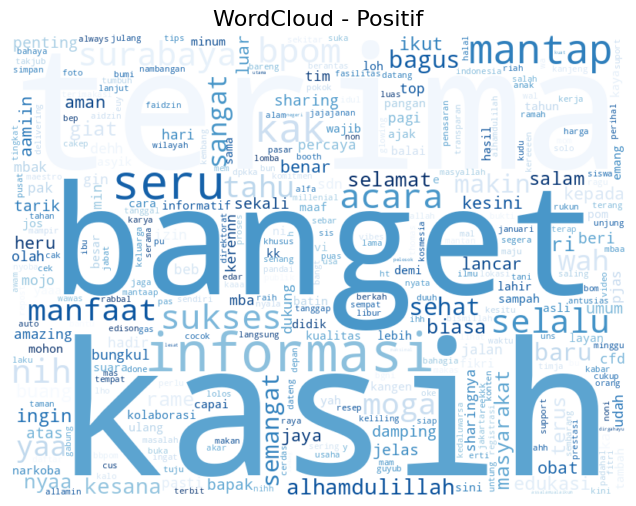

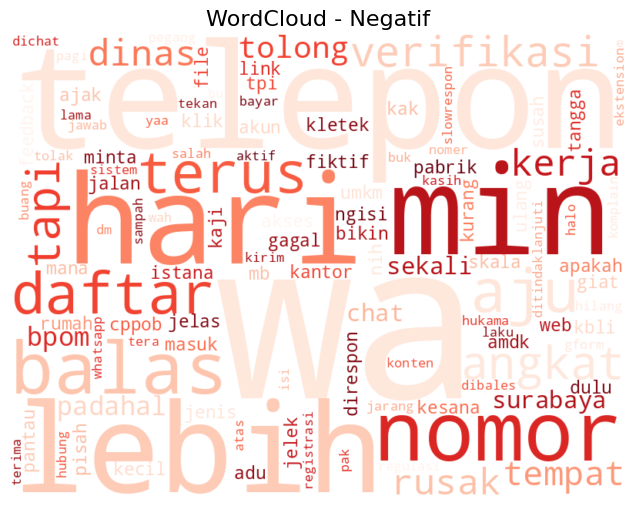

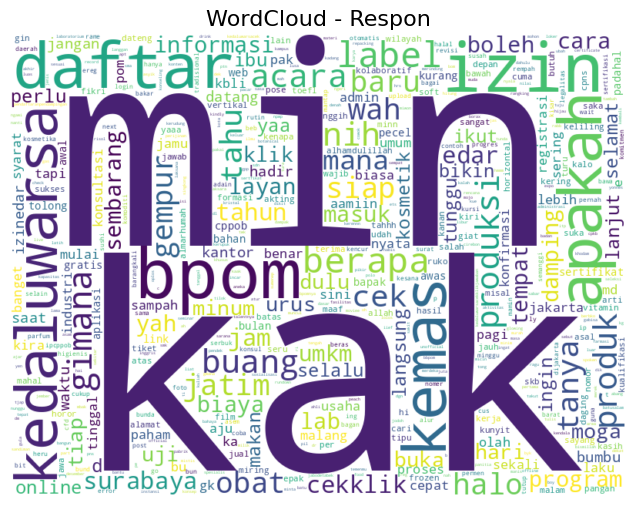

In [34]:
df_wordcloud = pd.DataFrame({'Teks_Bersih': databersih['Teks_Bersih'], 'label': data_clean['label']})

positif = " ".join(df_wordcloud[df_wordcloud['label'] == 'positif']['Teks_Bersih'])
negatif = " ".join(df_wordcloud[df_wordcloud['label'] == 'negatif']['Teks_Bersih'])
respon  = " ".join(df_wordcloud[df_wordcloud['label'] == 'respon']['Teks_Bersih'])

def generate_wordcloud(text, title, colormap=None):
    wc = WordCloud(
        width=800,
        height=600,
        background_color='white',
        max_words=500,
        collocations=False,
        random_state=42,
        colormap=colormap  # warna
    ).generate(text)

    plt.figure(figsize=(8,6))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=16)
    plt.show()


generate_wordcloud(positif, "WordCloud - Positif", colormap="Blues")
generate_wordcloud(negatif, "WordCloud - Negatif", colormap="Reds")
generate_wordcloud(respon, "WordCloud - Respon", colormap="viridis")

Distribusi kelas:
label_auto
positif    269
respon     222
negatif     20
Name: count, dtype: int64

=== Classification Report (Balanced Logistic Regression) ===
              precision    recall  f1-score   support

     negatif       1.00      0.25      0.40         4
     positif       0.92      0.85      0.88        54
      respon       0.83      0.96      0.89        45

    accuracy                           0.87       103
   macro avg       0.92      0.69      0.72       103
weighted avg       0.88      0.87      0.87       103



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


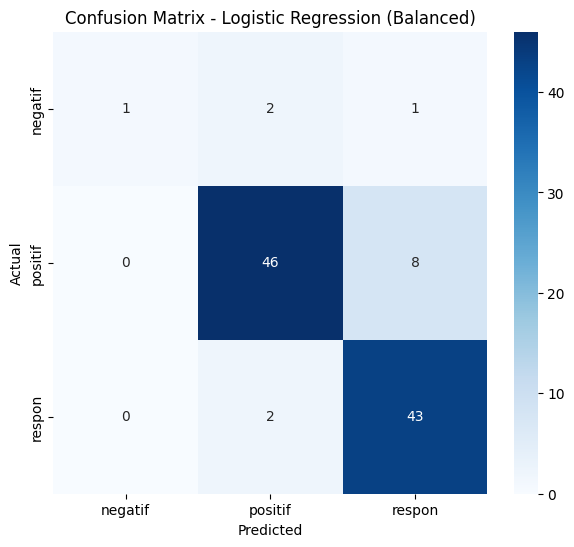


Komentar: produk ini berbahaya dan tidak ada izin bpom
Prediksi: respon

Komentar: terima kasih kak sudah dibalas admin
Prediksi: positif

Komentar: kualitas produknya bagus dan aman
Prediksi: positif

Komentar: saya kecewa dengan efeknya
Prediksi: respon

Komentar: pesanan sudah diterima
Prediksi: respon


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv("/content/data_bersih_labeled.csv")

df = df[df['label_auto'].isin(['positif', 'negatif', 'respon'])].copy()
df = df[['Teks_Bersih', 'label_auto']].dropna()

print("Distribusi kelas:")
print(df['label_auto'].value_counts())

X_train, X_test, y_train, y_test = train_test_split(
    df['Teks_Bersih'],
    df['label_auto'],
    test_size=0.2,
    random_state=42,
    stratify=df['label_auto']
)

tfidf = TfidfVectorizer(
    max_features=2000,
    ngram_range=(1,2),
    min_df=2,
    max_df=0.95,
    sublinear_tf=True
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    multi_class='ovr',
    solver='liblinear'
)

model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("\n=== Classification Report (Balanced Logistic Regression) ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(7,6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=model.classes_,
    yticklabels=model.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression (Balanced)")
plt.show()

def prediksi_kalimat(teks_list):
    vec = tfidf.transform(teks_list)
    return model.predict(vec)

uji = [
    "produk ini berbahaya dan tidak ada izin bpom",
    "terima kasih kak sudah dibalas admin",
    "kualitas produknya bagus dan aman",
    "saya kecewa dengan efeknya",
    "pesanan sudah diterima"
]

hasil = prediksi_kalimat(uji)

for t, h in zip(uji, hasil):
    print(f"\nKomentar: {t}\nPrediksi: {h}")